Machine Learning Internship at IIT ISM (Dhanbad):

Assignment-I (Exploratory Data Analysis)

Completed by,

      Ram Prasanna      
      Gayathri Lakshmi
      Kajal Tiwari
      Sandeep
      Sasi
      Tharun 
      Asim Arbind Samal
      Nandan
      Gourav Garg
      Kalyani
      

## Song Recommender System

## The datasets used are available at: https://static.turi.com/datasets/millionsong/10000.txt and https://static.turi.com/datasets/millionsong/song_data.csv¶


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=pd.read_csv("10000.txt",header=None,sep='\t')
df1.columns = ['user_id', 'song_id', 'listen_count']
df1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [3]:
df2=pd.read_csv("song_data.csv")
df2.drop_duplicates(['song_id'])
df2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


## Analysis:

In [4]:
print("Song_data shape:",df2.shape)
print("User_listen shape:",df1.shape)

Song_data shape: (1000000, 5)
User_listen shape: (2000000, 3)


In [5]:
df1.dropna(inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
user_id         object
song_id         object
listen_count    int64
dtypes: int64(1), object(2)
memory usage: 61.0+ MB


In [6]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999980 entries, 0 to 999999
Data columns (total 5 columns):
song_id        999980 non-null object
title          999980 non-null object
release        999980 non-null object
artist_name    999980 non-null object
year           999980 non-null int64
dtypes: int64(1), object(4)
memory usage: 45.8+ MB


In [7]:
df3=df1.groupby('song_id').user_id.count()
df3.head()

song_id
SOAAAGQ12A8C1420C8     66
SOAACPJ12A81C21360    147
SOAACSG12AB018DC80     67
SOAAEJI12AB0188AB5     62
SOAAFAC12A67ADF7EB    190
Name: user_id, dtype: int64

In [8]:
df3.describe()

count    10000.000000
mean       200.000000
std        317.715673
min         48.000000
25%         89.000000
50%        124.000000
75%        201.000000
max       8277.000000
Name: user_id, dtype: float64

In [9]:
df4=df1.groupby('song_id').listen_count.sum()
df4.head()

song_id
SOAAAGQ12A8C1420C8    227
SOAACPJ12A81C21360    352
SOAACSG12AB018DC80    158
SOAAEJI12AB0188AB5    131
SOAAFAC12A67ADF7EB    405
Name: listen_count, dtype: int64

In [10]:

df4.describe()

count    10000.000000
mean       609.096900
std       1401.268442
min         71.000000
25%        221.000000
50%        336.000000
75%        587.000000
max      54136.000000
Name: listen_count, dtype: float64

In [11]:

df=pd.merge(df1,df2,on="song_id")
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,7c86176941718984fed11b7c0674ff04c029b480,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
2,76235885b32c4e8c82760c340dc54f9b608d7d7e,SOAKIMP12A8C130995,3,The Cove,Thicker Than Water,Jack Johnson,0
3,250c0fa2a77bc6695046e7c47882ecd85c42d748,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
4,3f73f44560e822344b0fb7c6b463869743eb9860,SOAKIMP12A8C130995,6,The Cove,Thicker Than Water,Jack Johnson,0


In [13]:
df.groupby('title')['listen_count'].mean().sort_values(ascending=False).head()

title
221                                18.158228
Starshine                          16.891892
Crack Under Pressure               16.037500
The Quest                          15.976000
Clara meets Slope - Hard To Say    15.171756
Name: listen_count, dtype: float64

In [14]:
df.groupby('title')['listen_count'].count().sort_values(ascending=False).head()

title
Sehr kosmisch                     8277
Use Somebody                      7952
Undo                              7032
Dog Days Are Over (Radio Edit)    6949
You're The One                    6729
Name: listen_count, dtype: int64

In [15]:
listenCount=pd.DataFrame(df.groupby('title')['listen_count'].mean())

In [16]:
listenCount['num_of-listeners']=df.groupby('title')['listen_count'].count()

In [17]:
listenCount.head()

,listen_count,num_of-listeners
title,,
#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version),1.897436,78
#40,5.417160,338
& Down,1.981233,373
' Cello Song,2.466019,103
'97 Bonnie & Clyde,1.505376,93


In [18]:
listenCount['num_of-listeners'].describe()

count    9593.000000
mean      217.548838
std       361.615180
min        48.000000
25%        90.000000
50%       129.000000
75%       215.000000
max      8277.000000
Name: num_of-listeners, dtype: float64

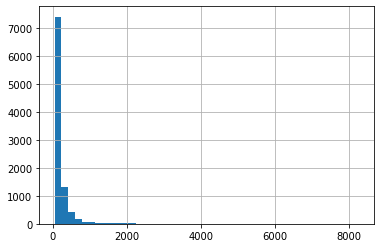

In [19]:
listenCount['num_of-listeners'].hist(bins=45)

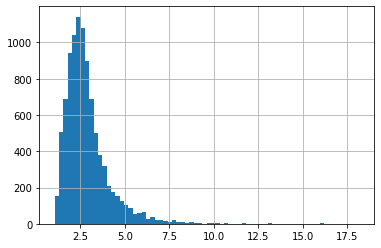

In [20]:

listenCount['listen_count'].hist(bins=70)

In [22]:
listenCount.sort_values('num_of-listeners',ascending=False).head(10)

,listen_count,num_of-listeners
title,,
Sehr kosmisch,3.749668,8277
Use Somebody,2.784205,7952
Undo,7.004124,7032
Dog Days Are Over (Radio Edit),3.836955,6949
You're The One,8.160945,6729
Revelry,6.740114,6145
Secrets,3.783599,5841
Somebody To Love,3.177237,5676
Yellow,2.758572,5658


## Creating Pivot Table:

In [23]:
songmat=df.pivot_table(index='user_id',columns='title',values='listen_count')
songmat.head()

title,#!*@ You Tonight [Featuring R. Kelly] (Explicit Album Version),#40,& Down,' Cello Song,'97 Bonnie & Clyde,'Round Midnight,'Til We Die (Album Version),'Till I Collapse,('Til) I Kissed You,(Anaesthesia) Pulling Teath,...,sillyworld (Album Version),sleep_ eat food_ have visions,smile around the face,sun drums and soil,teachme (Album Version),the Love Song,you were there with me,¡Viva La Gloria! (Album Version),¿Lo Ves? [Piano Y Voz],Época
user_id,,,,,,,,,,,,,,,,,,,,,
00003a4459f33b92906be11abe0e93efc423c0ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00005c6177188f12fb5e2e82cdbd93e8a3f35e64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00030033e3a2f904a48ec1dd53019c9969b6ef1f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007235c769e610e3d339a17818a5708e41008d9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fusntion of the Recommender System:

In [24]:
def corr(song):
    mat=songmat[song]
    similar_to=songmat.corrwith(mat)
    corr_s=pd.DataFrame(similar_to,columns=['Correlation'])
    corr_s.dropna(inplace=True)
    corr_s=corr_s.join(listenCount['num_of-listeners'])
    data=corr_s[corr_s['num_of-listeners']>750].sort_values('Correlation',ascending=False).head(6)
    print("The list of the 5 songs that you can prefer to listen afetr Sehr kosmisch are:")
    list=data.index.values.tolist()
    for i in range(len(list)-1):
        print(list[i+1])
    return ;

In [25]:
corr('Sehr kosmisch')

The list of the 5 songs that you can prefer to listen afetr Sehr kosmisch are:
Alejandro
Love Story
Our Song
Bring Me To Life
Secrets


In [26]:
corr('Yellow')

The list of the 5 songs that you can prefer to listen afetr Sehr kosmisch are:
Is This It
You Only Live Once
Forever
Half Of My Heart
When You Were Young
